Closed-Form RMSE: 5641.63
Gradient-Descent RMSE: 5641.63
sklearn RMSE: 5641.63


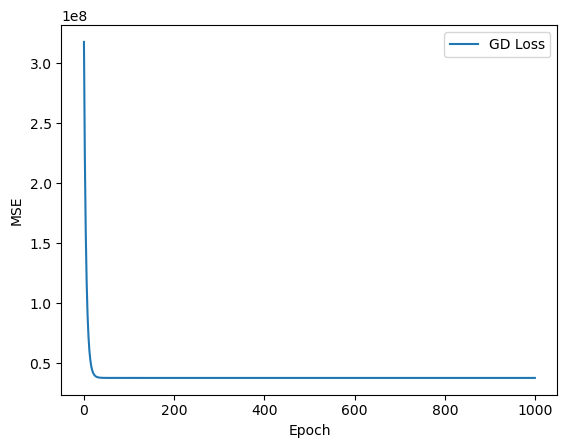

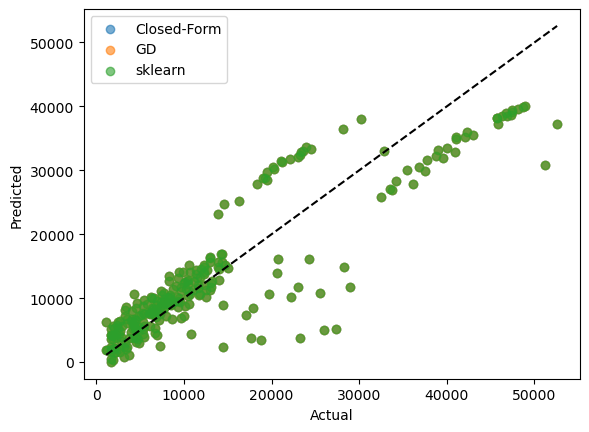

In [2]:

import pandas as pd
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df  = pd.read_csv(url)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
import numpy as np

# 1) One-hot encode
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

# 2) Split
X = df.drop('charges',axis=1).values
y = df['charges'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 3) Standardize
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

# 4) Add bias column
X_train_b = np.c_[np.ones((X_train_std.shape[0],1)), X_train_std]
X_test_b  = np.c_[np.ones((X_test_std.shape[0],1)),  X_test_std]

## Model 1: Closed-Form (Normal Equation)


# w = (X^T X)^{-1} X^T y
w_closed     = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)
y_pred_closed = X_test_b @ w_closed


## Model 2: Gradient Descent


class LinearRegressionGD:
    def __init__(self, eta=0.01, epochs=500):
        self.eta, self.epochs = eta, epochs

    def fit(self, X, y):
        m, n = X.shape
        self.w_   = np.zeros((n,1))
        self.loss_ = []
        for _ in range(self.epochs):
            y_pred = X @ self.w_
            error  = y_pred - y
            mse    = (error**2).mean()
            self.loss_.append(mse)
            grad   = (2/m)*(X.T @ error)
            self.w_ -= self.eta * grad
        return self

    def predict(self, X):
        return X @ self.w_

gd = LinearRegressionGD(eta=0.05, epochs=1000).fit(X_train_b, y_train)
y_pred_gd = gd.predict(X_test_b)


## Model 3: scikit-learn’s LinearRegression


from sklearn.linear_model import LinearRegression
sk = LinearRegression(fit_intercept=False).fit(X_train_b, y_train)
y_pred_sk = sk.predict(X_test_b)

## Evaluation


from sklearn.metrics import mean_squared_error
for name, y_pred in [
    ("Closed-Form",      y_pred_closed),
    ("Gradient-Descent", y_pred_gd),
    ("sklearn",          y_pred_sk)
]:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")

## Visualizations


import matplotlib.pyplot as plt

# Loss curve
plt.plot(gd.loss_, label="GD Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_pred_closed, label="Closed-Form", alpha=0.6)
plt.scatter(y_test, y_pred_gd,     label="GD",           alpha=0.6)
plt.scatter(y_test, y_pred_sk,     label="sklearn",      alpha=0.6)
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         "k--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()




# Example 1: Linear Regression on Medical Insurance Charges

**Definition**  
Linear regression fits  
\[
\hat y = w_1 x + w_0
\]  
to minimize  
\(\displaystyle \sum_{i=1}^m(y_i - \hat y_i)^2\).  
We’ll measure accuracy via RMSE:
\[
\text{RMSE} = \sqrt{\frac1m\sum_i(y_i - \hat y_i)^2}.
\]

---

## Data  
- **Dataset:** “Medical Cost Personal” (`insurance.csv`), 1,338 records  
- **Features:** `age`, `sex` (0/1), `bmi`, `children`, `smoker` (0/1), `region` (one-hot)  
- **Target:** `charges` (annual medical cost)

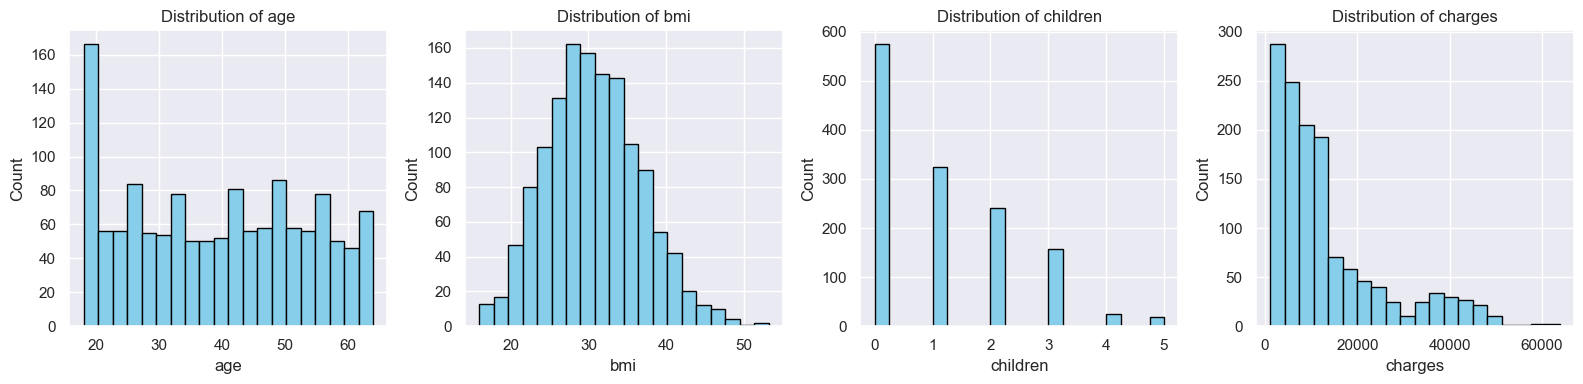

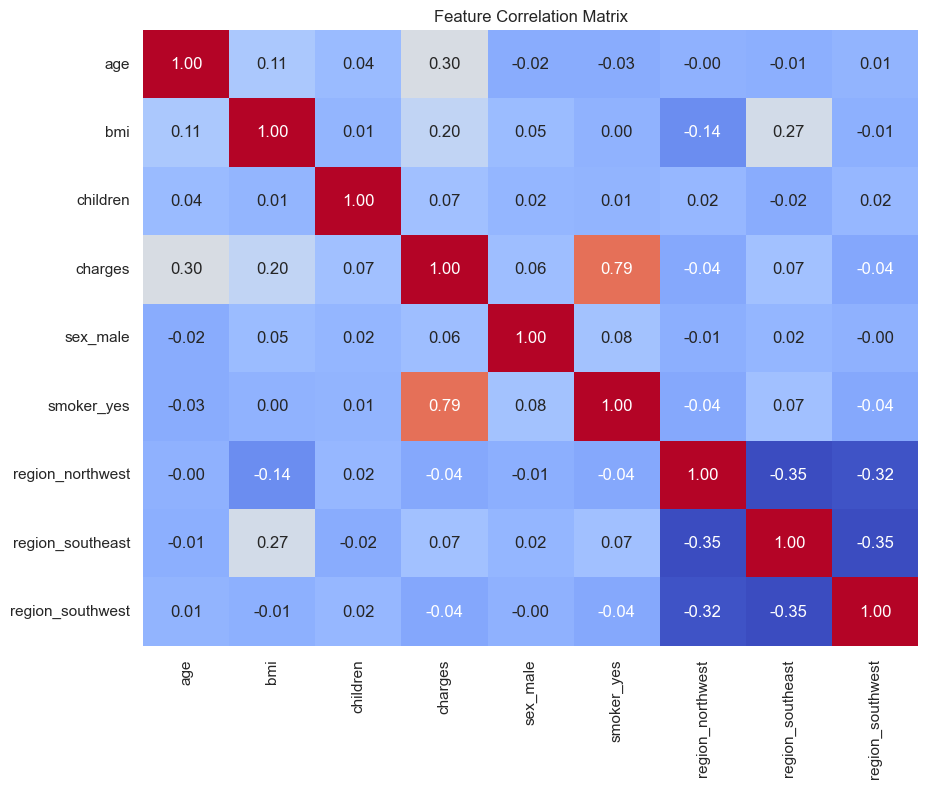

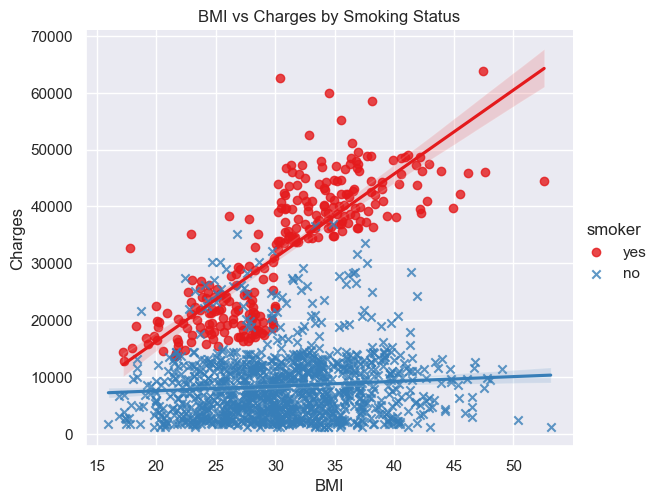

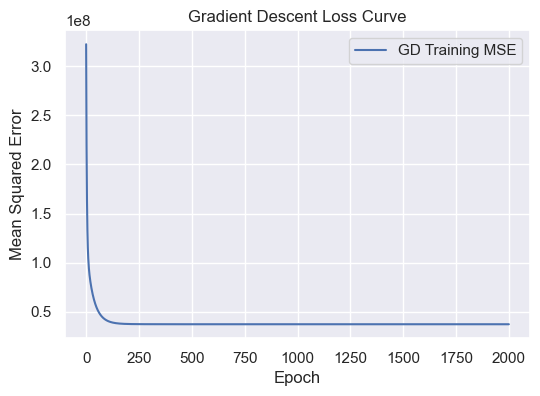

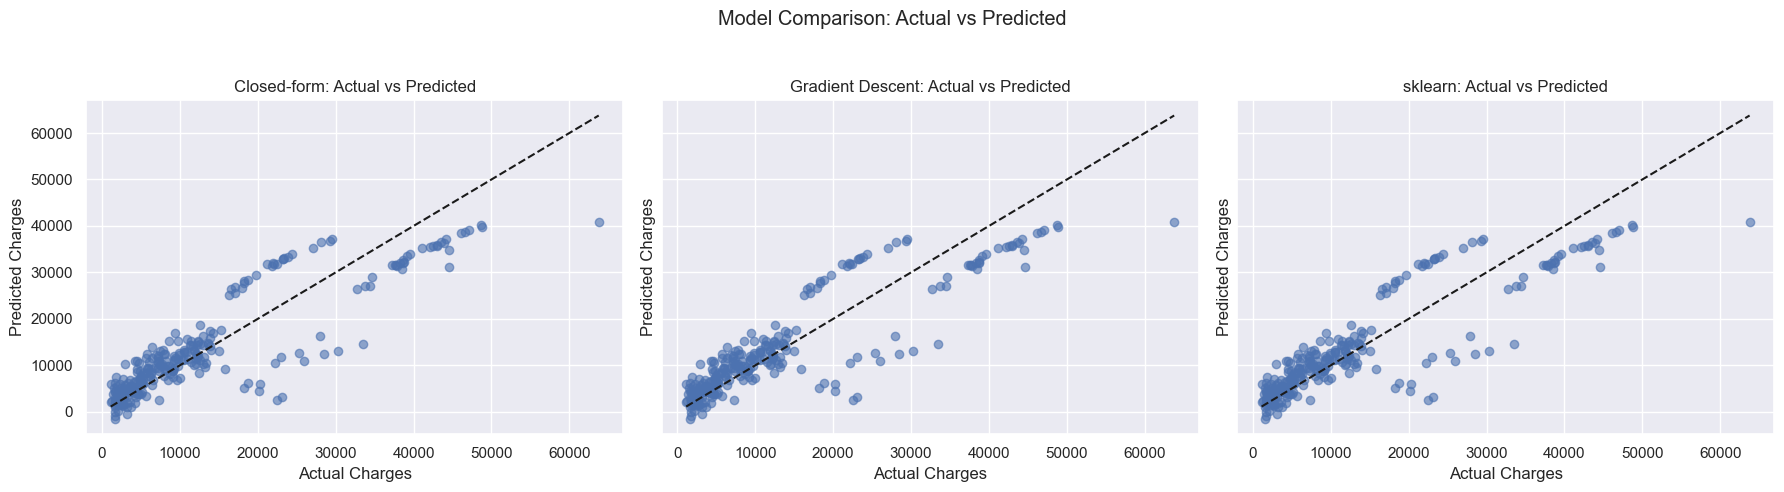

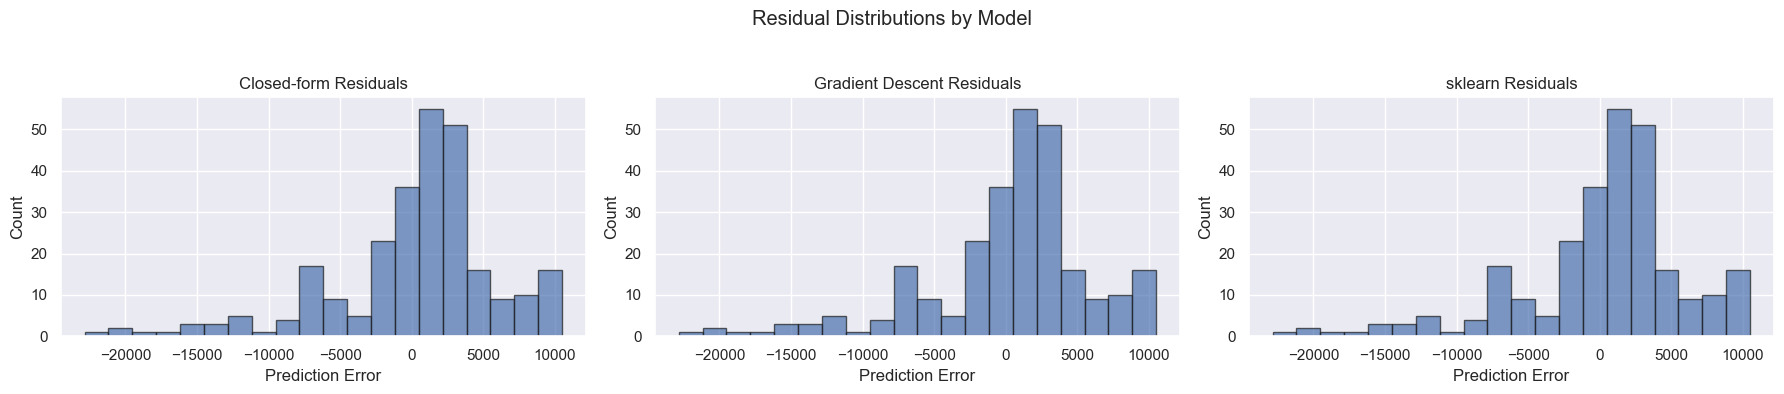

Closed-form coefficients:
  bias: 8955.245
  age: 3614.975
  bmi: 2036.228
  children: 516.890
  sex_male: -18.592
  smoker_yes: 23651.129
  region_northwest: -370.677
  region_southeast: -657.864
  region_southwest: -809.799

Gradient Descent coefficients:
  bias: 8955.163
  age: 3614.976
  bmi: 2036.221
  children: 516.890
  sex_male: -18.581
  smoker_yes: 23651.136
  region_northwest: -370.585
  region_southeast: -657.769
  region_southwest: -809.705

sklearn coefficients:
  bias: 8955.245
  age: 3614.975
  bmi: 2036.228
  children: 516.890
  sex_male: -18.592
  smoker_yes: 23651.129
  region_northwest: -370.677
  region_southeast: -657.864
  region_southwest: -809.799


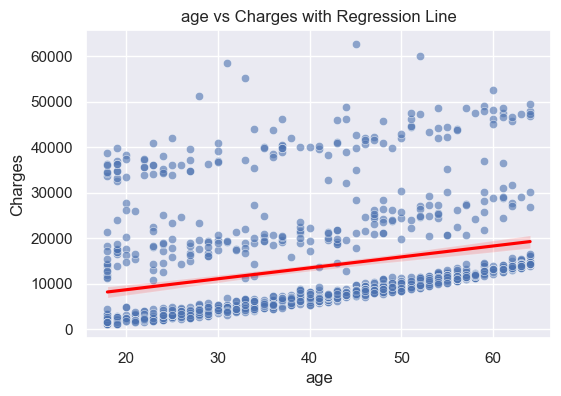

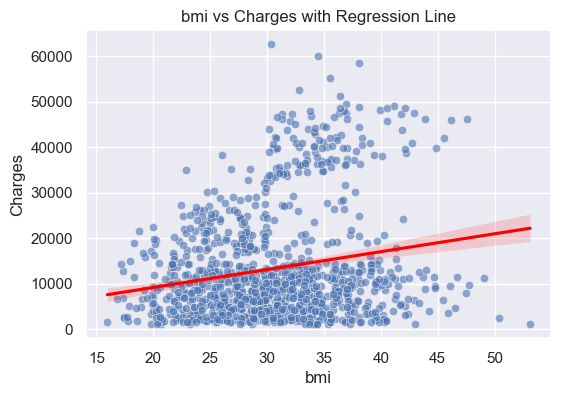

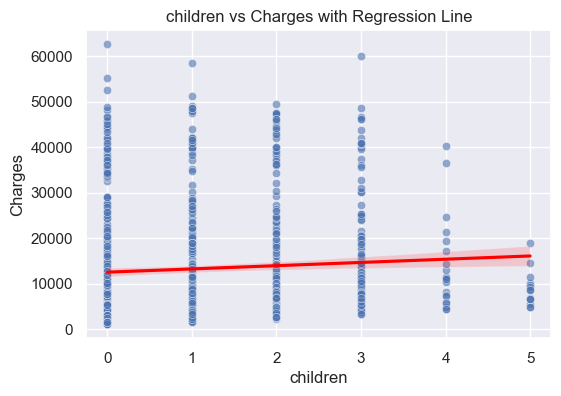

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_theme()

# 1. Load data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df  = pd.read_csv(url)

# 2. Initial histograms
plt.figure(figsize=(16,4))
for i, col in enumerate(['age','bmi','children','charges']):
    ax = plt.subplot(1,4,i+1)
    df[col].hist(bins=20, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
df_enc = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
plt.figure(figsize=(10,8))
sns.heatmap(df_enc.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title('Feature Correlation Matrix')
plt.show()

# 4. BMI vs Charges by Smoking Status
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df,
           markers=['o','x'], palette='Set1', height=5, aspect=1.2)
plt.title('BMI vs Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# 5. Train/test split
X = df_enc.drop('charges', axis=1)
y = df_enc['charges'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Normalize numeric features
numeric_cols = ['age','bmi','children']
scaler = StandardScaler().fit(X_train[numeric_cols])
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()
X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# 7. Closed-form solution (multivariate)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled.values]
X_test_b  = np.c_[np.ones((X_test_scaled.shape[0],1)),  X_test_scaled.values]
w_closed      = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)
y_pred_closed = X_test_b @ w_closed

# 8. Gradient Descent implementation
class LinearRegressionGD:
    def __init__(self, eta=0.01, epochs=2000):
        self.eta, self.epochs = eta, epochs
    def fit(self, X, y):
        m, n = X.shape
        self.w_   = np.zeros((n,1))
        self.loss_ = []
        for _ in range(self.epochs):
            y_pred = X @ self.w_
            error  = y_pred - y
            self.loss_.append((error**2).mean())
            grad = (2/m) * (X.T @ error)
            self.w_ -= self.eta * grad
        return self
    def predict(self, X):
        return (X @ self.w_).flatten()

gd = LinearRegressionGD(eta=0.05, epochs=2000).fit(X_train_b, y_train)
y_pred_gd = gd.predict(X_test_b)

# 9. scikit-learn LinearRegression for comparison
sk = LinearRegression(fit_intercept=False).fit(X_train_b, y_train)
y_pred_sk = sk.predict(X_test_b)

# 10. Loss curve for Gradient Descent
plt.figure(figsize=(6,4))
plt.plot(gd.loss_, label="GD Training MSE")
plt.title('Gradient Descent Loss Curve')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

# 11. Actual vs Predicted subplots
models = [
    ("Closed-form",      y_pred_closed.flatten()),
    ("Gradient Descent", y_pred_gd),
    ("sklearn",          y_pred_sk.flatten())
]
lims = [y_test.min(), y_test.max()]
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=True)
for ax, (name, y_pred) in zip(axes, models):
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot(lims, lims, 'k--')
    ax.set_title(f'{name}: Actual vs Predicted')
    ax.set_xlabel("Actual Charges")
    ax.set_ylabel("Predicted Charges")
plt.suptitle('Model Comparison: Actual vs Predicted')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 12. Residual histograms
fig, axes = plt.subplots(1, 3, figsize=(18,4), sharex=True)
for ax, (name, y_pred) in zip(axes, models):
    res = y_pred - y_test.flatten()
    ax.hist(res, bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'{name} Residuals')
    ax.set_xlabel("Prediction Error")
    ax.set_ylabel("Count")
plt.suptitle('Residual Distributions by Model')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 13. Print coefficients
feature_names = ['bias'] + list(X_train_scaled.columns)
print("Closed-form coefficients:")
for name, coef in zip(feature_names, w_closed.flatten()):
    print(f"  {name}: {coef:.3f}")
print("\nGradient Descent coefficients:")
for name, coef in zip(feature_names, gd.w_.flatten()):
    print(f"  {name}: {coef:.3f}")
print("\nsklearn coefficients:")
for name, coef in zip(feature_names, sk.coef_.flatten()):
    print(f"  {name}: {coef:.3f}")

# 14. Scatter + regression line for individual features
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_train[col], y=y_train.flatten(), alpha=0.6)
    sns.regplot(x=X_train[col], y=y_train.flatten(), scatter=False, color='red')
    plt.title(f'{col} vs Charges with Regression Line')
    plt.xlabel(col)
    plt.ylabel("Charges")
    plt.show()
